In [ ]:
from google.colab import files 
uploaded=files.upload()

Saving USA_Housing.CSV to USA_Housing.CSV


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
import io
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv(io.StringIO(uploaded['USA_Housing.CSV'].decode('utf-8')))
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [ ]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


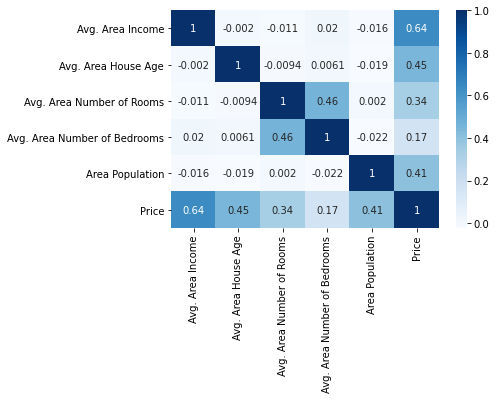

In [ ]:
sns.heatmap(df.corr(),cmap="Blues",annot=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
y=df[['Price']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)


In [ ]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'Predicted value')

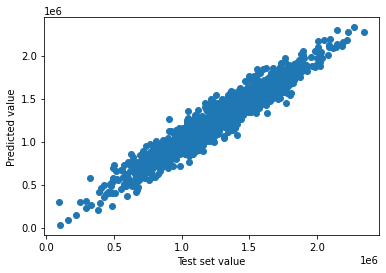

In [ ]:
pred=regr.predict(x_test)
plt.scatter(pred,y_test)
plt.xlabel("Test set value")
plt.ylabel("Predicted value")

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 81257.55795855916
MSE: 10169125565.897552
RMSE: 100842.08231635022


In [ ]:
coeff_df = pd.DataFrame(regr.coef_.transpose(),x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.617635
Avg. Area House Age,165221.119872
Avg. Area Number of Rooms,121405.376596
Avg. Area Number of Bedrooms,1318.718783
Area Population,15.225196


In [ ]:
regr.predict(x[79545.458574,5.682861,7.009188,4.09,23086.800503])

KeyError: ignored